In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Initial imports
import numpy as np
import pandas as pd
import seaborn as sns
from pathlib import Path
from collections import Counter
import plotly.express as px
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [3]:
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import confusion_matrix
from imblearn.metrics import classification_report_imbalanced

In [4]:
# Load the crypto_data.csv dataset.
file_path = "Resources/healthXjob_final_2.csv"
job_health_df = pd.read_csv(file_path, index_col=0, encoding="ISO-8859-1")
print(job_health_df.shape)
job_health_df.head(10)

(400, 34)


,Year,Province,Sex,Age_group,Arthritis,Asthma,Obese,Overweight,Cannabis_daily,Cannabis_past_12_ m,...,J_L_R_Dissatisfied,J_L_R_Going_to_school,J_L_R_not_worked_last_year,J_L_R_Never_worked,J_L_R_Other_reasons,J_L_R_Own_illness_disability,J_L_R_Permanent_layoff,J_L_R_Personal_family_reasons,J_L_R_Retired,J_L_R_Temporary_layoff
0,2017,Alberta,Females,1,14300.0,50600.0,82500.0,112700.0,NaN,NaN,...,5000.0,37700.0,24600.0,103400.0,1700.0,0.0,23500.0,1500.0,0.0,0.0
1,2017,Alberta,Females,2,44600.0,39500.0,133000.0,112300.0,NaN,NaN,...,10500.0,7300.0,242200.0,66600.0,11200.0,7500.0,58600.0,23100.0,0.0,0.0
2,2017,Alberta,Females,3,127600.0,24800.0,112400.0,112000.0,NaN,NaN,...,3300.0,0.0,153900.0,14100.0,0.0,4600.0,17400.0,0.0,7600.0,0.0
3,2017,Alberta,Females,4,147900.0,17900.0,66800.0,91600.0,NaN,NaN,...,0.0,0.0,392700.0,49000.0,0.0,0.0,6500.0,0.0,10000.0,0.0
4,2017,Alberta,Males,1,11700.0,51800.0,124000.0,172400.0,NaN,NaN,...,9000.0,41600.0,30600.0,105000.0,0.0,0.0,31000.0,0.0,0.0,0.0
5,2017,Alberta,Males,2,58700.0,29100.0,170900.0,187200.0,NaN,NaN,...,7200.0,7700.0,94200.0,22600.0,6700.0,7200.0,72900.0,0.0,0.0,3200.0
6,2017,Alberta,Males,3,104300.0,24000.0,144200.0,176800.0,NaN,NaN,...,1500.0,0.0,101300.0,5500.0,0.0,1800.0,23600.0,0.0,7000.0,0.0
7,2017,Alberta,Males,4,103300.0,13300.0,64000.0,93900.0,NaN,NaN,...,0.0,0.0,319800.0,12100.0,0.0,0.0,7500.0,0.0,11200.0,0.0
8,2017,British Columbia,Females,1,12200.0,31600.0,55600.0,137300.0,NaN,NaN,...,5100.0,36100.0,22800.0,99600.0,3800.0,1600.0,24600.0,0.0,0.0,0.0
9,2017,British Columbia,Females,2,35200.0,49200.0,96300.0,106200.0,NaN,NaN,...,9700.0,9800.0,236400.0,76000.0,10200.0,8600.0,40800.0,27700.0,0.0,0.0


In [5]:
#find null values
for column in job_health_df.columns:
    print(f'{column} has {job_health_df[column].isnull().sum()} null values')

Year has 0 null values
Province has 0 null values
Sex has 0 null values
Age_group has 0 null values
Arthritis has 0 null values
Asthma has 0 null values
Obese has 0 null values
Overweight has 0 null values
Cannabis_daily has 160 null values
Cannabis_past_12_ m has 160 null values
Pulmonary_disease has 0 null values
Current_smoker_daily has 0 null values
Current_smoker_occasional has 0 null values
Diabetes has 0 null values
Heavy_drinking has 0 null values
High_blood_pressure has 0 null values
Life_satisfaction_satisfied has 0 null values
Mood_disorder has 0 null values
Perceived_health_poor has 0 null values
Perceived_health_good has 0 null values
Perceived_life_stress has 0 null values
Perceived_mental_health_poor has 0 null values
Perceived_mental_health_good has 0 null values
Sense_belonging_community has 0 null values
J_L_R_Dissatisfied has 0 null values
J_L_R_Going_to_school has 0 null values
J_L_R_not_worked_last_year has 0 null values
J_L_R_Never_worked has 0 null values
J_L_R_O

In [6]:
job_health_df.dtypes

Year                               int64
Province                          object
Sex                               object
Age_group                          int64
Arthritis                        float64
Asthma                           float64
Obese                            float64
Overweight                       float64
Cannabis_daily                   float64
Cannabis_past_12_ m              float64
Pulmonary_disease                float64
Current_smoker_daily             float64
Current_smoker_occasional        float64
Diabetes                         float64
Heavy_drinking                   float64
High_blood_pressure              float64
Life_satisfaction_satisfied      float64
Mood_disorder                    float64
Perceived_health_poor            float64
Perceived_health_good            float64
Perceived_life_stress            float64
Perceived_mental_health_poor     float64
Perceived_mental_health_good     float64
Sense_belonging_community        float64
J_L_R_Dissatisfi

In [7]:
#Encoding data
labelDict = {}
for feature in job_health_df:
    le = preprocessing.LabelEncoder()
    le.fit(job_health_df[feature])
    le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
    job_health_df[feature] = le.transform(job_health_df[feature])
    # Get labels
    labelKey = 'label_' + feature
    labelValue = [*le_name_mapping]
    labelDict[labelKey] =labelValue
    
for key, value in labelDict.items():     
    print(key, value)

label_Year [2017, 2018, 2019, 2020, 2021]
label_Province ['Alberta', 'British Columbia', 'Manitoba', 'New Brunswick', 'Newfoundland and Labrador', 'Nova Scotia', 'Ontario', 'Prince Edward Island', 'Quebec', 'Saskatchewan']
label_Sex ['Females', 'Males']
label_Age_group [1, 2, 3, 4]
label_Arthritis [0.0, 1800.0, 2200.0, 2500.0, 3500.0, 3800.0, 4300.0, 4500.0, 4700.0, 5100.0, 5200.0, 5300.0, 5500.0, 5600.0, 5800.0, 5900.0, 6100.0, 6600.0, 6700.0, 6800.0, 6900.0, 7300.0, 7500.0, 7700.0, 8100.0, 8200.0, 8300.0, 8400.0, 8600.0, 8700.0, 8800.0, 9200.0, 9500.0, 9700.0, 9800.0, 10200.0, 10300.0, 10400.0, 10500.0, 10800.0, 11200.0, 11300.0, 11400.0, 11500.0, 11700.0, 11800.0, 12000.0, 12200.0, 12300.0, 13000.0, 13200.0, 13300.0, 13400.0, 13500.0, 13800.0, 14000.0, 14300.0, 14800.0, 15100.0, 15200.0, 15300.0, 15400.0, 15800.0, 16000.0, 16400.0, 17100.0, 17400.0, 17500.0, 18100.0, 19000.0, 19100.0, 19200.0, 19300.0, 19600.0, 20400.0, 20600.0, 21000.0, 21600.0, 22000.0, 22400.0, 23300.0, 23700.0, 

In [8]:
# Use get_dummies() to create variables for text features.
x = pd.get_dummies(job_health_df, columns=['Province', 'Sex'])
print(x.shape)
x.head(10)

(400, 44)


,Year,Age_group,Arthritis,Asthma,Obese,Overweight,Cannabis_daily,Cannabis_past_12_ m,Pulmonary_disease,Current_smoker_daily,...,Province_2,Province_3,Province_4,Province_5,Province_6,Province_7,Province_8,Province_9,Sex_0,Sex_1
0,0,0,56,128,190,193,139,209,0,168,...,0,0,0,0,0,0,0,0,1,0
1,0,1,150,116,243,192,139,209,36,182,...,0,0,0,0,0,0,0,0,1,0
2,0,2,212,94,218,191,139,209,62,165,...,0,0,0,0,0,0,0,0,1,0
3,0,3,222,85,182,181,139,209,69,135,...,0,0,0,0,0,0,0,0,1,0
4,0,0,44,131,235,227,139,209,0,204,...,0,0,0,0,0,0,0,0,0,1
5,0,1,176,102,262,242,139,209,0,210,...,0,0,0,0,0,0,0,0,0,1
6,0,2,199,91,253,231,139,209,65,216,...,0,0,0,0,0,0,0,0,0,1
7,0,3,198,72,181,182,139,209,67,108,...,0,0,0,0,0,0,0,0,0,1
8,0,0,47,108,179,207,139,209,0,149,...,0,0,0,0,0,0,0,0,1,0
9,0,1,121,127,207,187,139,209,0,153,...,0,0,0,0,0,0,0,0,1,0


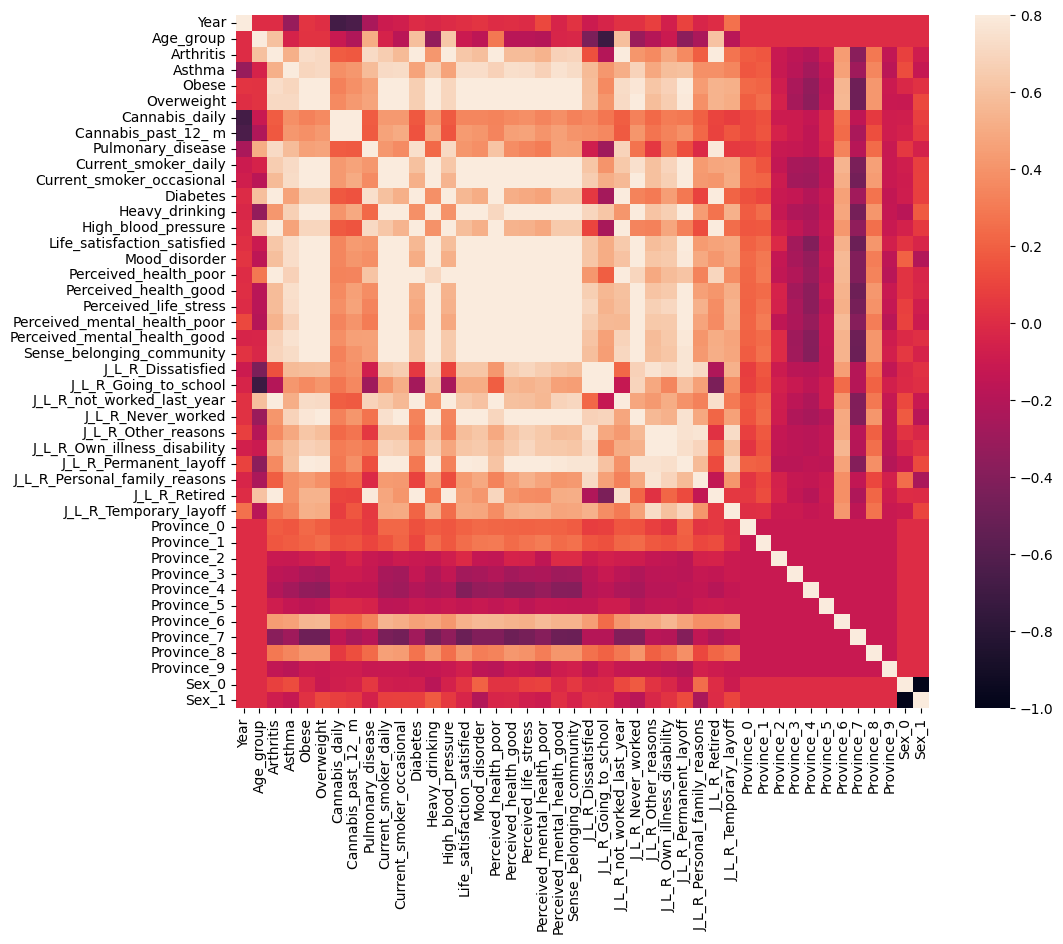

In [9]:
#correlation matrix
corrmat = x.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);
plt.show()

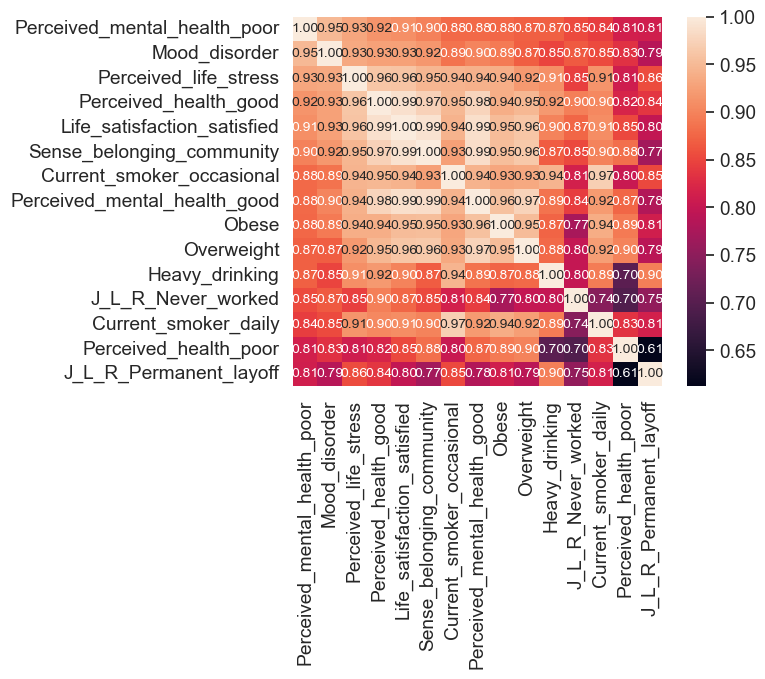

In [10]:
#treatment correlation matrix
k = 15 #number of variables for heatmap
cols = corrmat.nlargest(k, 'Perceived_mental_health_poor')['Perceived_mental_health_poor'].index
cm = np.corrcoef(job_health_df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

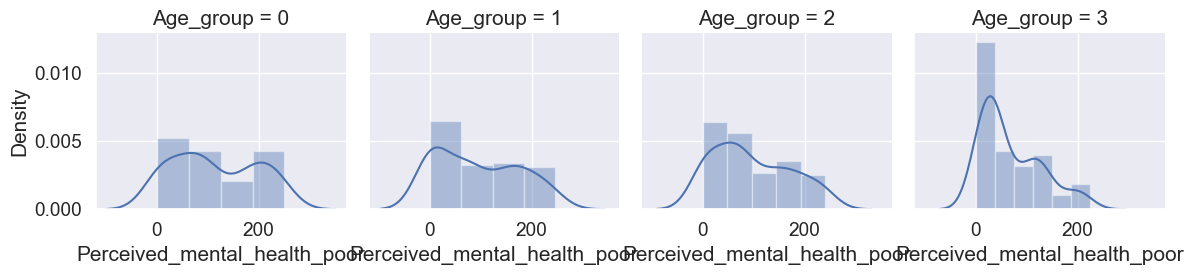

In [34]:
g = sns.FacetGrid(job_health_df, col='Age_group')
g = g.map(sns.distplot, "Perceived_mental_health_poor")

In [12]:
# Standardize the data with StandardScaler().
x = StandardScaler().fit_transform(x)
#print(x[0:4])

In [21]:
# Create our target
y_col = [i for i in job_health_df.columns if i in ('J_L_R_Permanent_layoff')]
y = (job_health_df[y_col])
label_encoder = LabelEncoder()
y["J_L_R_Permanent_layoff"] = label_encoder.fit_transform(y["J_L_R_Permanent_layoff"])

In [22]:
# Check the balance of our target values
y["J_L_R_Permanent_layoff"].value_counts()

8      8
41     6
13     6
11     6
15     5
      ..
66     1
144    1
191    1
119    1
70     1
Name: J_L_R_Permanent_layoff, Length: 251, dtype: int64

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=1)
#Counter(y_train)

In [24]:
# Resample the training data with the BalancedRandomForestClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

# Creating a StandardScaler instance.
scaler = StandardScaler()
# Fitting the Standard Scaler with the training data.
X_scaler = scaler.fit(X_train)

# Scaling the data.
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

rf_model = RandomForestClassifier(n_estimators=100, random_state=1).fit(X_train_scaled, y_train) 

In [25]:
# Calculated the balanced accuracy score
y_pred = rf_model.predict(X_test_scaled)
acc_score = balanced_accuracy_score(y_test, y_pred)
print(f"Accuracy Score : {acc_score}")

Accuracy Score : 0.07303370786516854


In [31]:
# Display the confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm
#cm_df = pd.DataFrame(cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"])

#display(cm_df)

array([[0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0]], dtype=int64)

In [27]:
# Print the imbalanced classification report
print(classification_report_imbalanced(y_test, y_pred))

                   pre       rec       spe        f1       geo       iba       sup

          0       0.00      0.00      0.99      0.00      0.00      0.00         1
          1       0.00      0.00      0.98      0.00      0.00      0.00         0
          2       0.00      0.00      1.00      0.00      0.00      0.00         1
          6       0.00      0.00      1.00      0.00      0.00      0.00         1
          7       1.00      1.00      1.00      1.00      1.00      1.00         1
          8       0.33      1.00      0.98      0.50      0.99      0.98         1
          9       0.00      0.00      0.99      0.00      0.00      0.00         1
         10       0.00      0.00      1.00      0.00      0.00      0.00         2
         11       0.50      0.50      0.99      0.50      0.70      0.47         2
         12       0.50      1.00      0.99      0.67      0.99      0.99         1
         13       0.50      1.00      0.99      0.67      0.99      0.99         1
   

In [28]:
sorted(zip(x.columns, rf_model.feature_importances_), key = lambda x: x[1], reverse=True)

AttributeError: 'numpy.ndarray' object has no attribute 'columns'